### Data Scraping and Cleaning

In [97]:
from jobspy import scrape_jobs
import pandas as pd
import numpy as np
from IPython.display import display
import re
import warnings

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 150)
warnings.filterwarnings("ignore", category=FutureWarning)

In [99]:
# Define 6 states
states = ["Texas, USA", "California, USA", "New York, USA", "Illinois, USA", "Florida, USA", "Washington, USA"]
all_jobs = []

In [100]:
# Loop through each state and scrape
for state in states:
    jobs = scrape_jobs(
        site_name="indeed",
        search_term="data analyst",
        location=state,
        results_wanted=50,
        country_indeed="USA"
    )
    jobs['state'] = state  # add state label
    all_jobs.append(jobs)

In [101]:
# Combine all into one DataFrame
df_all = pd.concat(all_jobs, ignore_index=True)

In [102]:
df_all["salary"] = df_all[["min_amount","max_amount"]].mean(axis=1)
df_all["is_remote"] = df_all["is_remote"].replace({True: "Yes", False: "No"})

In [103]:
df= df_all[["title","company", "location","state", "date_posted", "job_type", "salary", "is_remote", "job_url_direct"]].copy()
display(df.head())

,title,company,location,state,date_posted,job_type,salary,is_remote,job_url_direct
0,Data Services Analyst,Real Time Resolutions Inc,"Dallas, TX, US","Texas, USA",2025-08-29,fulltime,56000.0,Yes,http://www.indeed.com/job/data-services-analyst-ea9c995e9d7dac5d
1,Business Intelligence & Strategy Analyst,McKesson,"Irving, TX, US","Texas, USA",2025-08-28,NaN,147050.0,No,https://careers.mckesson.com/en/job/-/-/733/85568404272
2,Data Analytics Lead Analyst - Vice President,Information Technology Senior Management Forum,"Irving, TX, US","Texas, USA",2025-08-28,fulltime,157200.0,No,https://jobs.itsmfleaders.org/job/8e438e/data-analytics-lead-analyst-vice-president/irving/tx
3,IT Business Analyst,Firefly Aerospace,"Cedar Park, TX, US","Texas, USA",2025-08-28,fulltime,103106.5,No,https://firefly.hrmdirect.com/employment/view.php?req=3506469&jbsrc=1014&location=0dfda81b-6879-da33-d79a-5b3f12789446
4,Senior Data Analyst,Tidewater Inc.,"San Antonio, TX, US","Texas, USA",2025-08-28,NaN,NaN,No,https://workforcenow.adp.com/mascsr/default/mdf/recruitment/recruitment.html?cid=e418bd0b-7969-4544-ae32-4d02487e979c&ccId=19000101_000001&jobId=5...


In [104]:
print(f"Total columns shown: {len(df.columns)}")

Total columns shown: 9


In [105]:
#to see how the locations are displayed.
print("Unique locations found: ")
print(df["location"].unique())

Unique locations found: 
['Dallas, TX, US' 'Irving, TX, US' 'Cedar Park, TX, US'
 'San Antonio, TX, US' 'Austin, TX, US' 'Arlington, TX, US'
 'Plano, TX, US' 'Fort Worth, TX, US' 'Westlake, TX, US' 'Houston, TX, US'
 'Katy, TX, US' 'Huntsville, TX, US' 'Richardson, TX, US' 'Frisco, TX, US'
 'Killeen, TX, US' 'Lewisville, TX, US' 'San Ramon, CA, US'
 'Santa Rosa, CA, US' 'San Jose, CA, US' 'Newport Beach, CA, US'
 'Port Hueneme, CA, US' 'Torrance, CA, US' 'Santa Monica, CA, US'
 'Anaheim, CA, US' 'Cupertino, CA, US' 'San Diego, CA, US'
 'Lompoc, CA, US' 'Sacramento, CA, US' 'Camp Pendleton, CA, US'
 'San Francisco, CA, US' 'Beverly Hills, CA, US' 'Santa Clara, CA, US'
 'CA, US' 'Pleasanton, CA, US' 'San Pedro, CA, US' 'Irvine, CA, US'
 'Los Angeles, CA, US' 'El Segundo, CA, US' 'Whittier, CA, US'
 'El Monte, CA, US' 'Palo Alto, CA, US' 'Sunnyvale, CA, US'
 'Williamsville, NY, US' 'Brooklyn, NY, US' 'Clifton Park, NY, US'
 'New York, NY, US' 'Albany, NY, US' 'Hauppauge, NY, US'
 'Getzvil

In [106]:
#filter with entry-level role keywords
experience = ["entry", "junior", "new grad"]
df_entry_level = df[df["title"].str.contains('|'.join(experience), case =False, na=False)]
display(df_entry_level.head(30))

,title,company,location,state,date_posted,job_type,salary,is_remote,job_url_direct
31,Junior Business Analyst - Asset Management,Zekelman Industries,"Austin, TX, US","Texas, USA",2025-08-27,fulltime,65000.0,No,https://zekelman.wd12.myworkdayjobs.com/Careers/job/Chandler-AZ/Junior-Business-Analyst---Asset-Management_JR000718
89,Financial Analyst (Entry-Level or Associate)),Boeing,"El Segundo, CA, US","California, USA",2025-08-27,NaN,75050.0,No,https://jobs.boeing.com/job/-/-/185/85503786160
209,"Analyst, Senior Data Entry (1st & 2nd shift)",AAR Corp.,"Miami, FL, US","Florida, USA",2025-08-28,fulltime,45821.5,No,https://aarcorp.taleo.net/careersection/2/jobdetail.ftl?job=17725&tz=GMT-05%3A00&tzname=America%2FChicago


In [107]:
#filtering jobs by location:
florida_jobs = df[df["location"].str.contains("FL", case = True, na=False)]
california_jobs = df[df["location"].str.contains("CA", case = True, na=False)]
texas_jobs = df[df["location"].str.contains("TX", case = True, na=False)]
illinois_jobs = df[df["location"].str.contains("IL", case = True, na=False)]
newyork_jobs = df[df["location"].str.contains("NY", case = True, na=False)]
washington_jobs = df[df["location"].str.contains("WA", case = True, na=False)]

In [108]:
#display(florida_jobs.head(10))
#display(washington_jobs.head())

In [109]:
#check missing values per column
print(df.isnull().sum())

title              0
company            7
location           0
state              0
date_posted        0
job_type          60
salary            25
is_remote          0
job_url_direct     0
dtype: int64


In [110]:
#dropping the row that had missing value from column
df.dropna(subset=["company", "title", "location", "salary"], inplace =True)

In [111]:
# for job_type that has missing value, we change the NAN to unknown
df["job_type"]= df["job_type"].fillna("Unknown")

In [112]:
print(df.isnull().sum())

title             0
company           0
location          0
state             0
date_posted       0
job_type          0
salary            0
is_remote         0
job_url_direct    0
dtype: int64


In [113]:
#removing special(non-alpha numeric) characters and trailing job IDs from job title
df["title"] = df["title"].str.replace(r"[^a-zA-Z0-9\s]", "", regex = True) 
df["title"] = df["title"].str.strip()  # remove leading/trailing whitespace

In [114]:
#check and remove duplicate rows
df.duplicated().sum()

0

In [115]:
#drop duplicates if any
df = df.drop_duplicates()

In [116]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           269 non-null    object 
 1   company         269 non-null    object 
 2   location        269 non-null    object 
 3   state           269 non-null    object 
 4   date_posted     269 non-null    object 
 5   job_type        269 non-null    object 
 6   salary          269 non-null    float64
 7   is_remote       269 non-null    object 
 8   job_url_direct  269 non-null    object 
dtypes: float64(1), object(8)
memory usage: 21.0+ KB
None


In [117]:
#since salary is the only numeric column
print(df.describe())

              salary
count     269.000000
mean    92602.685874
std     41964.590870
min        17.500000
25%     72590.000000
50%     93125.000000
75%    116000.000000
max    188600.000000


In [118]:
# Quick look at unique job types, remote roles,and location counts.
print(df["job_type"].value_counts())
print("\n--------------------------------")
print(df["is_remote"].value_counts())
print("\n--------------------------------")
print(df["location"].value_counts().head(10))

job_type
fulltime              208
Unknown                51
internship              3
fulltime, contract      2
parttime                2
temporary               1
parttime, fulltime      1
contract                1
Name: count, dtype: int64

--------------------------------
is_remote
No     223
Yes     46
Name: count, dtype: int64

--------------------------------
location
New York, NY, US     25
Seattle, WA, US      23
Chicago, IL, US      19
Bellevue, WA, US     18
Austin, TX, US       17
Tampa, FL, US        10
Dallas, TX, US        8
Miami, FL, US         7
San Diego, CA, US     7
San Jose, CA, US      6
Name: count, dtype: int64


### Exploratory Data Analysis(EDA) 

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [120]:
df["salary"] = df["salary"].replace({np.inf: np.nan, -np.inf: np.nan})

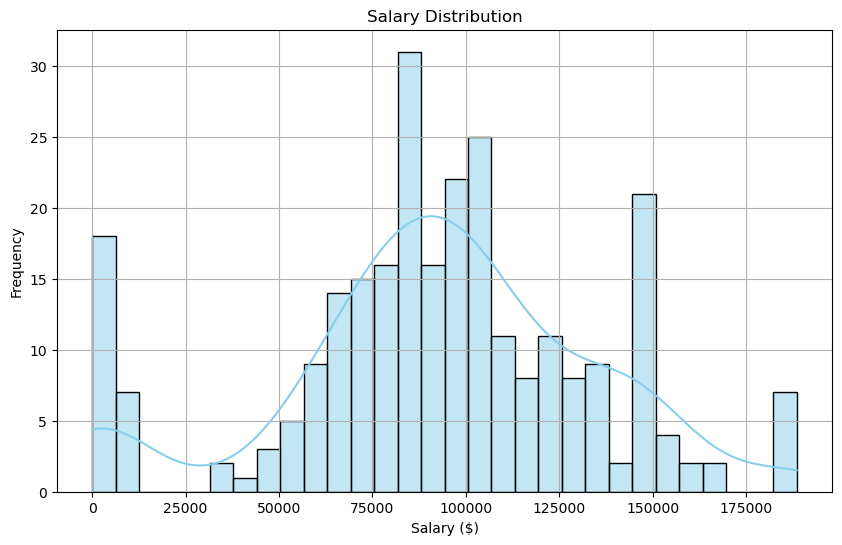

In [121]:
plt.figure(figsize=(10,6))
sns.histplot(df["salary"], bins=30, kde=True, color="skyblue")
plt.title("Salary Distribution")
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [122]:
# Count the most common job titles
top_titles = df["title"].value_counts().nlargest(10)

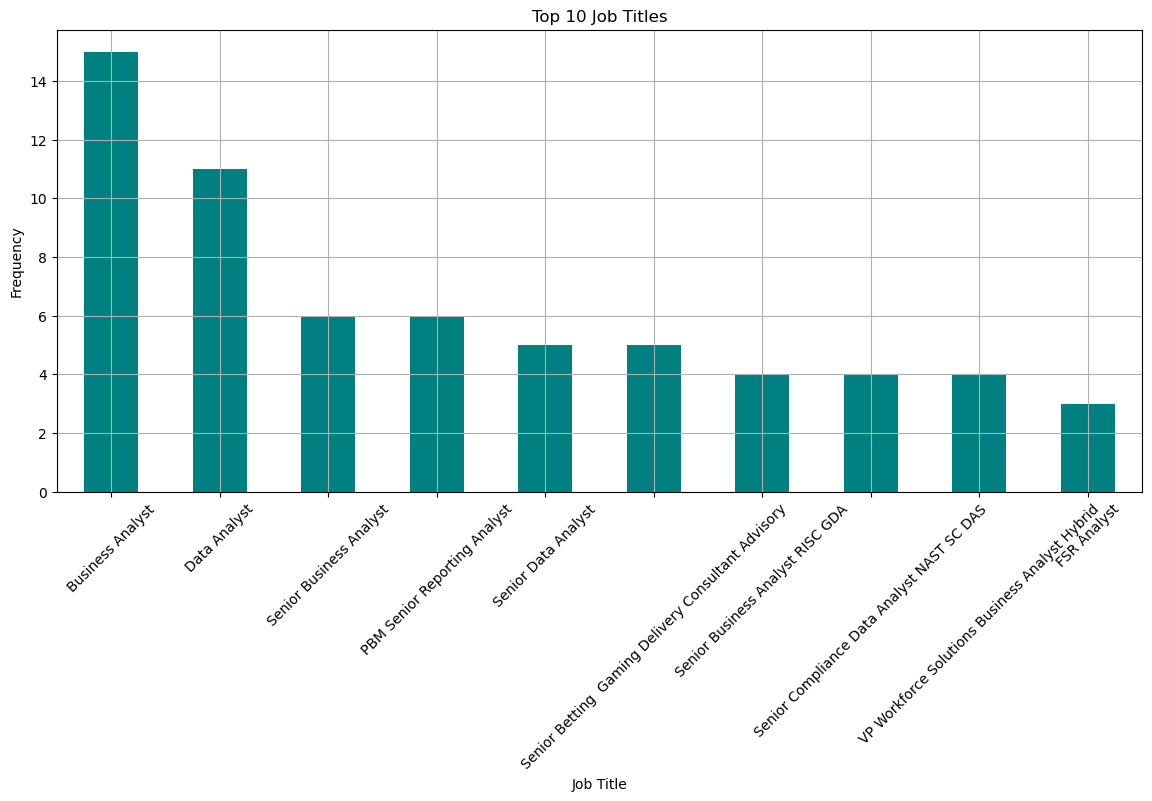

In [123]:
plt.figure(figsize=(14,6))
top_titles.plot(kind="bar", color="teal")
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [124]:
# Count the most common job locations
top_locations = df["location"].value_counts().nlargest(10)

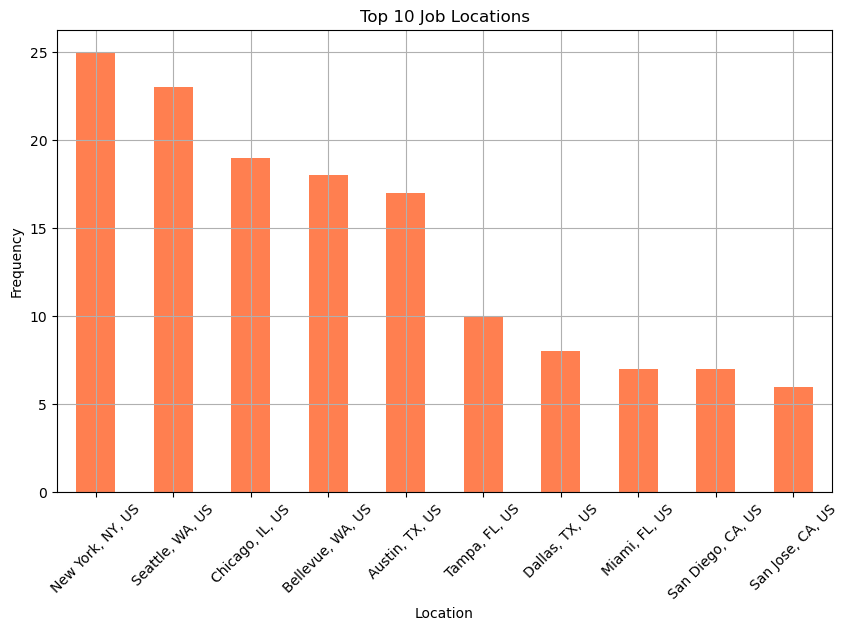

In [125]:
plt.figure(figsize=(10,6))
top_locations.plot(kind="bar", color="coral")
plt.title("Top 10 Job Locations")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

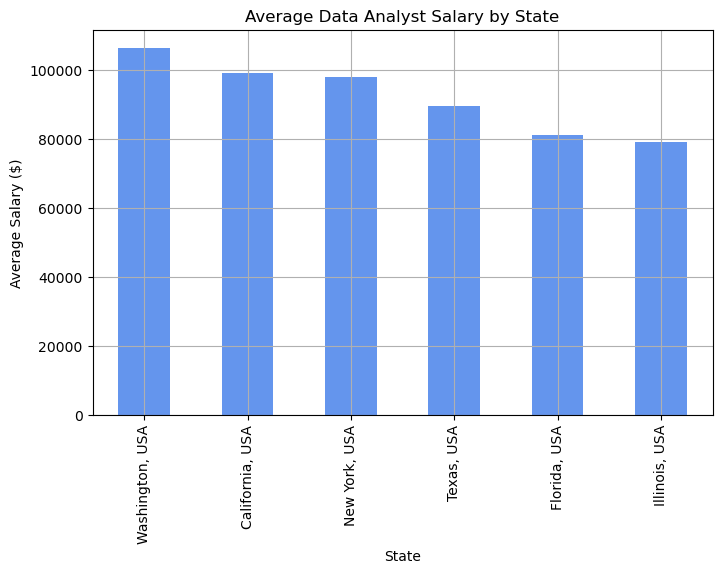

In [126]:
avg_salary_by_state = df.groupby("state")["salary"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
avg_salary_by_state.plot(kind="bar", color="cornflowerblue")
plt.title("Average Data Analyst Salary by State")
plt.ylabel("Average Salary ($)")
plt.xlabel("State")
plt.grid(True)
plt.show()

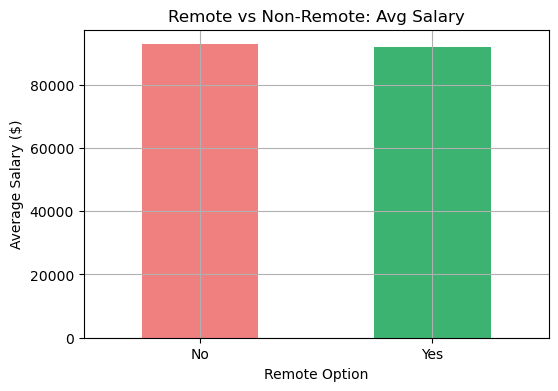

In [127]:
avg_salary_remote = df.groupby("is_remote")["salary"].mean()

plt.figure(figsize=(6,4))
avg_salary_remote.plot(kind="bar", color=["lightcoral", "mediumseagreen"])
plt.title("Remote vs Non-Remote: Avg Salary")
plt.xlabel("Remote Option")
plt.ylabel("Average Salary ($)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

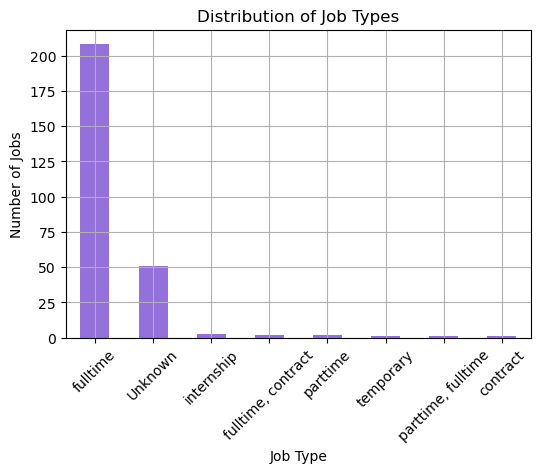

In [128]:
#Distribution of Job Types
job_type_counts = df["job_type"].value_counts()

plt.figure(figsize=(6,4))
job_type_counts.plot(kind="bar", color="mediumpurple")
plt.title("Distribution of Job Types")
plt.ylabel("Number of Jobs")
plt.xlabel("Job Type")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

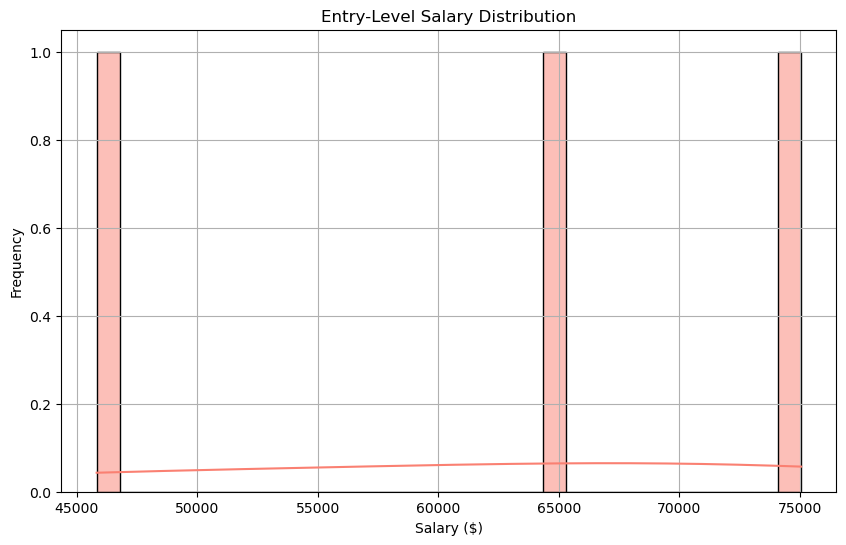

In [129]:
#Entry-level Salary Distribution
plt.figure(figsize=(10,6))
sns.histplot(df_entry_level["salary"], bins=30, kde=True, color="salmon")
plt.title("Entry-Level Salary Distribution")
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

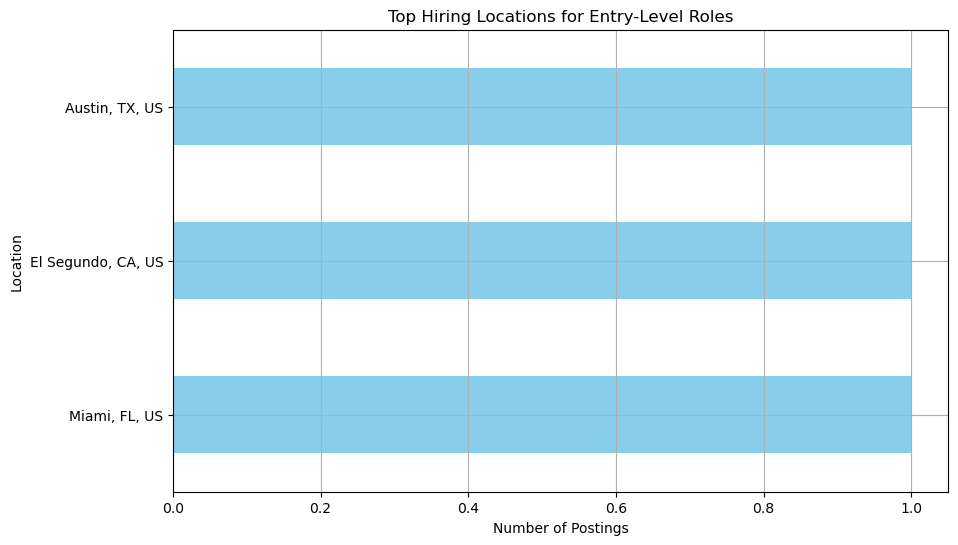

In [130]:
# top hiring location for entry roles
df_entry_level["location"].value_counts().head(15).plot(kind="barh", figsize=(10,6), color="skyblue")
plt.title("Top Hiring Locations for Entry-Level Roles")
plt.xlabel("Number of Postings")
plt.ylabel("Location")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

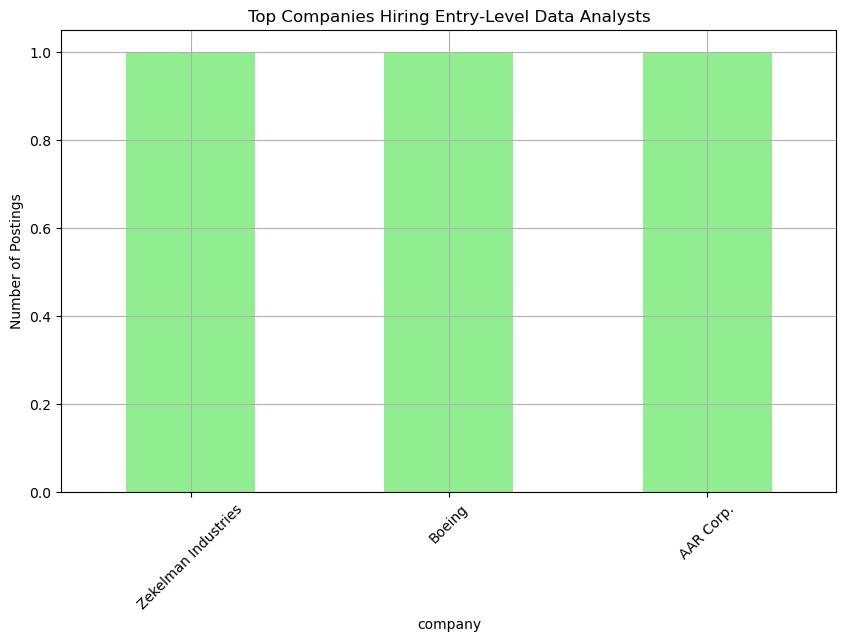

In [131]:
# top company hiring data anlayst
df_entry_level["company"].value_counts().head(15).plot(kind="bar", figsize=(10,6), color="lightgreen")
plt.title("Top Companies Hiring Entry-Level Data Analysts")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

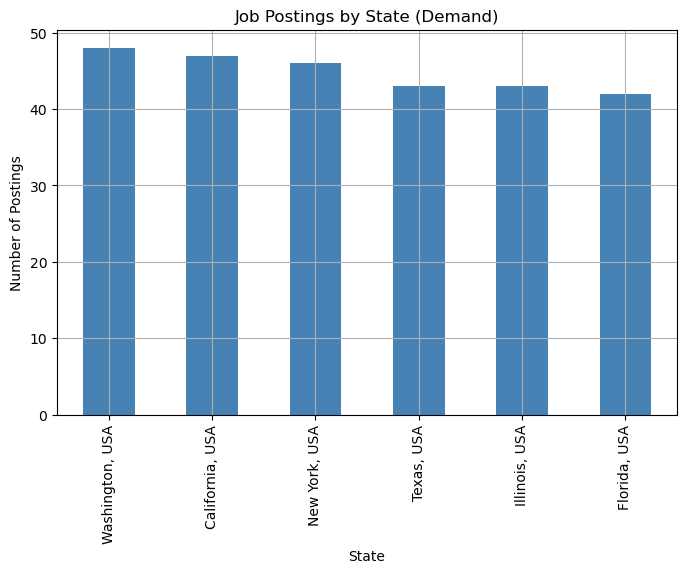

In [132]:
# Demand by state (# of postings)
demand_by_state = df["state"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,5))
demand_by_state.plot(kind="bar", color="steelblue")
plt.title("Job Postings by State (Demand)")
plt.ylabel("Number of Postings")
plt.xlabel("State")
plt.grid(True)
plt.show()

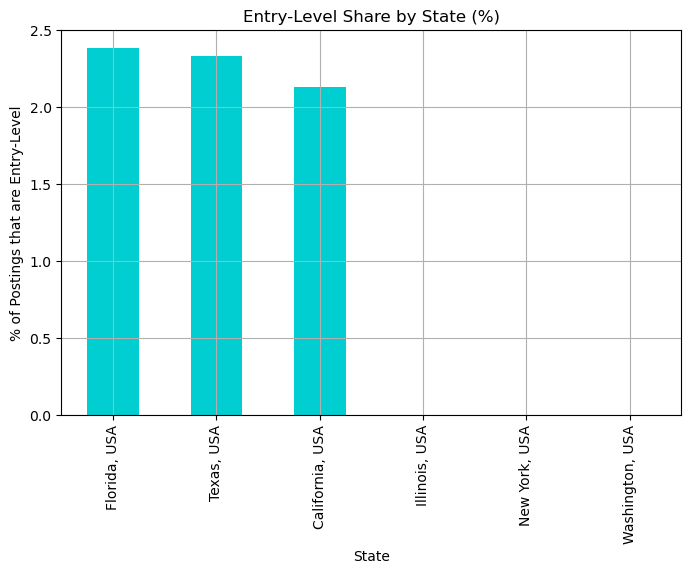

In [133]:
# Entry-level share by state (% of postings in that state)
# (matches entry-level filter semantics based on title keywords)
df["_is_entry"] = df["title"].str.contains("entry|junior|new grad", case=False, na=False)
entry_share_by_state = df.groupby("state")["_is_entry"].mean().mul(100).sort_values(ascending=False)

plt.figure(figsize=(8,5))
entry_share_by_state.plot(kind="bar", color="darkturquoise")
plt.title("Entry-Level Share by State (%)")
plt.ylabel("% of Postings that are Entry-Level")
plt.xlabel("State")
plt.grid(True)
plt.show()

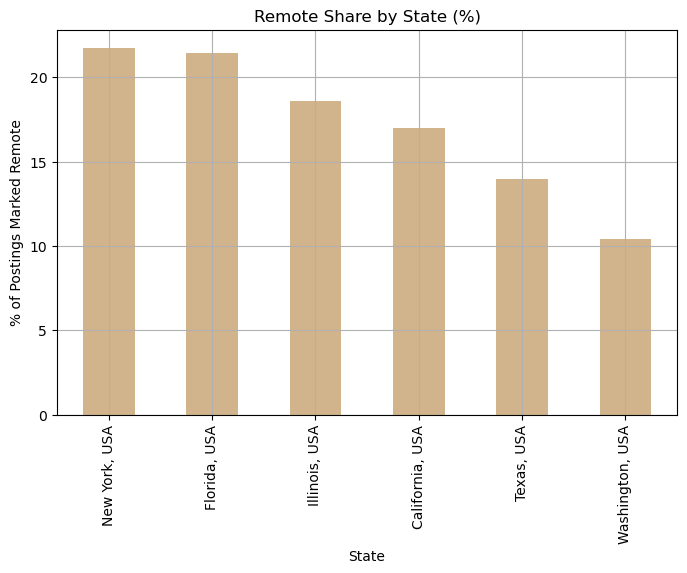

In [134]:
# Remote share by state
df["_is_remote_yes"] = df["is_remote"].astype(str).str.lower().eq("yes")
remote_share_by_state = df.groupby("state")["_is_remote_yes"].mean().mul(100).sort_values(ascending=False)

plt.figure(figsize=(8,5))
remote_share_by_state.plot(kind="bar", color="tan")
plt.title("Remote Share by State (%)")
plt.ylabel("% of Postings Marked Remote")
plt.xlabel("State")
plt.grid(True)
plt.show()

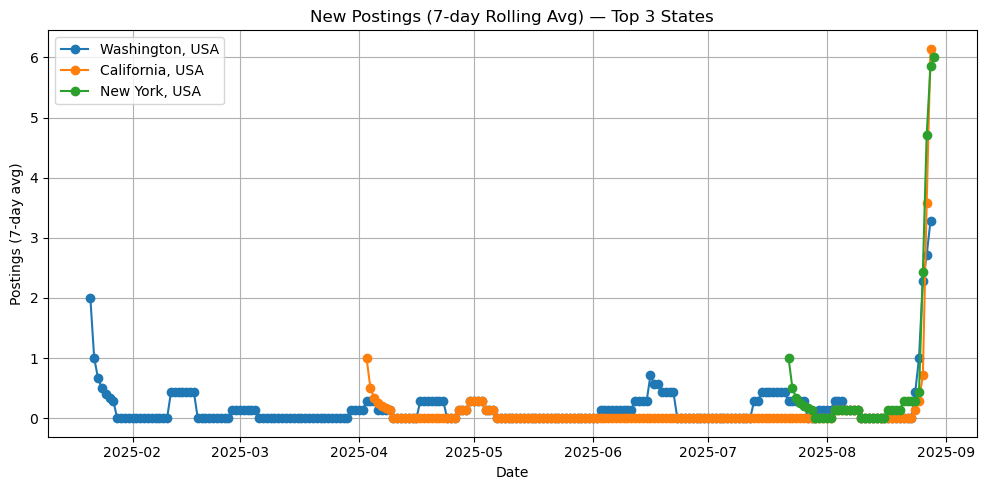

In [135]:
# Time trend 
df["_date"] = pd.to_datetime(df["date_posted"], errors="coerce")
daily = (
    df.dropna(subset=["_date"])
      .groupby(["state", "_date"])
      .size()
      .rename("postings")
      .reset_index()
)
if not daily.empty:
    top3 = daily.groupby("state")["postings"].sum().sort_values(ascending=False).head(3).index.tolist()
    plt.figure(figsize=(10,5))
    for st in top3:
        s = (daily[daily["state"] == st]
             .sort_values("_date")
             .set_index("_date")["postings"]
             .asfreq("D").fillna(0)
             .rolling(7, min_periods=1).mean())
        plt.plot(s.index, s.values, marker="o", label=st)
    plt.title("New Postings (7-day Rolling Avg) — Top 3 States")
    plt.xlabel("Date")
    plt.ylabel("Postings (7-day avg)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


===== State Ranking: Best Markets for Entry-Level Data Analysts =====
                 demand  avg_salary  entry_share_pct  remote_share_pct  \
state                                                                    
California, USA      47     98912.0              2.1              17.0   
Washington, USA      48    106303.0              0.0              10.4   
New York, USA        46     97906.0              0.0              21.7   
Texas, USA           43     89433.0              2.3              14.0   
Florida, USA         42     81177.0              2.4              21.4   
Illinois, USA        43     79069.0              0.0              18.6   

                 market_score  
state                          
California, USA         0.779  
Washington, USA         0.600  
New York, USA           0.558  
Texas, USA              0.455  
Florida, USA            0.419  
Illinois, USA           0.158  


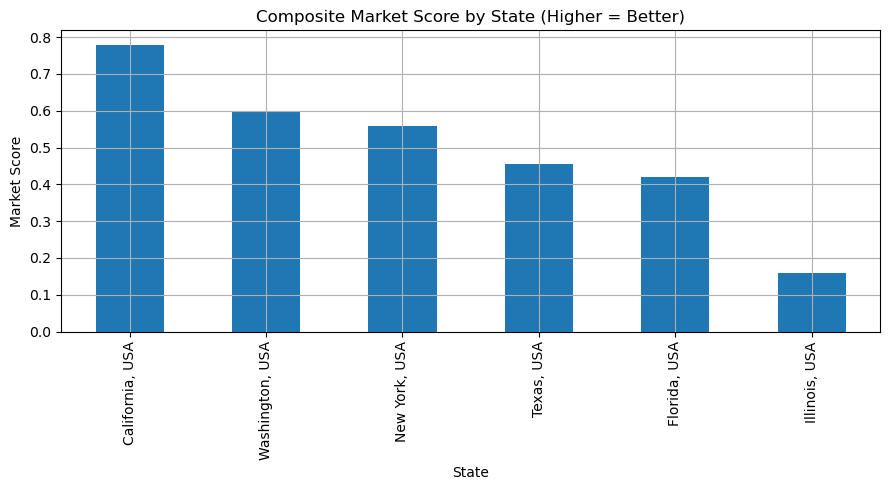

In [136]:
# Goal: Best state for an entry-level analyst considering demand, pay, entry availability, and remote options.
score_df = pd.DataFrame({
    "demand": demand_by_state,
    "avg_salary": avg_salary_by_state,
    "entry_share_pct": entry_share_by_state,
    "remote_share_pct": remote_share_by_state
}).dropna(how="any")  # need all four to score

# Normalize each metric to 0–1 (min-max) so we can combine fairly
def minmax(s):
    s = s.astype(float)
    if s.max() == s.min():  # avoid div by zero if constant
        return pd.Series(0.5, index=s.index)
    return (s - s.min()) / (s.max() - s.min())

score_df["z_demand"] = minmax(score_df["demand"])
score_df["z_salary"] = minmax(score_df["avg_salary"])
score_df["z_entry"] = minmax(score_df["entry_share_pct"])
score_df["z_remote"] = minmax(score_df["remote_share_pct"])

# You can tweak weights to your preference; here all equal
w_demand = 0.30
w_salary = 0.30
w_entry  = 0.25
w_remote = 0.15

score_df["market_score"] = (
    w_demand*score_df["z_demand"] +
    w_salary*score_df["z_salary"] +
    w_entry*score_df["z_entry"] +
    w_remote*score_df["z_remote"]
)

state_ranking = score_df.sort_values("market_score", ascending=False)

print("\n===== State Ranking: Best Markets for Entry-Level Data Analysts =====")
print(state_ranking[["demand","avg_salary","entry_share_pct","remote_share_pct","market_score"]]
      .round({"avg_salary":0, "entry_share_pct":1, "remote_share_pct":1, "market_score":3}))

plt.figure(figsize=(9,5))
state_ranking["market_score"].plot(kind="bar")
plt.title("Composite Market Score by State (Higher = Better)")
plt.ylabel("Market Score")
plt.xlabel("State")
plt.grid(True)
plt.tight_layout()
plt.show()

In [137]:
print("\n----- INSIGHTS TO QUOTE -----")
if not avg_salary_by_state.empty:
    top_pay_state = avg_salary_by_state.idxmax()
    print(f"• Highest average salary: {top_pay_state} (${avg_salary_by_state[top_pay_state]:.0f}).")
if not demand_by_state.empty:
    top_demand_state = demand_by_state.idxmax()
    print(f"• Highest demand (most postings): {top_demand_state} ({int(demand_by_state[top_demand_state])} postings).")
if not entry_share_by_state.empty:
    best_entry_state = entry_share_by_state.idxmax()
    print(f"• Best entry-level availability: {best_entry_state} ({entry_share_by_state[best_entry_state]:.1f}% of postings).")
if not remote_share_by_state.empty:
    best_remote_state = remote_share_by_state.idxmax()
    print(f"• Most remote-friendly: {best_remote_state} ({remote_share_by_state[best_remote_state]:.1f}% remote).")
if not state_ranking.empty:
    best_overall = state_ranking.index[0]
    print(f"• Overall best state for entry-level analysts (composite score): {best_overall}.")


----- INSIGHTS TO QUOTE -----
• Highest average salary: Washington, USA ($106303).
• Highest demand (most postings): Washington, USA (48 postings).
• Best entry-level availability: Florida, USA (2.4% of postings).
• Most remote-friendly: New York, USA (21.7% remote).
• Overall best state for entry-level analysts (composite score): California, USA.


# 📑 Findings

As of Aug 29, 2025, Based on the exploratory data analysis of Data Analyst job postings across six U.S. states, the following key insights were observed:

### Salary Insights
- **Overall Salary Distribution**: Salaries are concentrated between \$60k–\$110k, with a few high-paying roles above \$150k.  
- **Average Salary by State**: Washington leads with the highest average salary (~\$106k), followed by New York and California.  
- **Remote vs Non-Remote Salaries**: Remote roles pay slightly more on average, showing flexibility does not require compromising pay.  
- **Entry-Level Salary Range**: Entry-level jobs typically fall between \$45k–\$75k, below overall averages but consistent with early-career expectations.  

### Demand & Job Availability
- **Highest Demand**: Washington has the greatest number of postings (48), closely followed by California and New York.  
- **New Postings Over Time**: Hiring activity spiked recently across Washington, California, and New York, signaling fresh demand.  
- **Entry-Level Availability**: Entry-level positions are scarce overall, with Florida showing the highest share (2.5%).  

### Job Characteristics
- **Top Job Titles**: “Business Analyst” and “Data Analyst” dominate postings, with senior titles like “Senior Data Analyst” also appearing frequently.  
- **Top Job Locations**: New York City, Seattle, and Chicago are the leading hubs for postings.  
- **Job Type Distribution**: Full-time roles overwhelmingly dominate, with very few part-time, contract, or internship listings.  

### Remote Work & Flexibility
- **Most Remote-Friendly State**: New York leads with 26% of postings marked as remote, while Washington lags at ~10%.  
- **Composite Market Score**: When combining salary, demand, entry-level availability, and remote share, **California ranks as the best overall state for entry-level analysts**, even though it doesn’t top any single metric.  

### Employers & Entry-Level Hiring
- **Top Companies**: Boeing, AAR Corp., and Zekelman Industries stand out as companies posting for entry-level analysts.  
- **Top Entry-Level Locations**: Austin (TX), El Segundo (CA), and Miami (FL) appear as the main cities with entry-level opportunities.  


### Exporting CSV

In [138]:
df.to_csv("Data-Analyst-Roles.csv", index=False)

In [139]:
tmp = df.copy()
tmp["date_posted_dt"] = pd.to_datetime(tmp["date_posted"], errors="coerce")
(tmp.dropna(subset=["date_posted_dt"])
   .groupby(["state","date_posted_dt"])
   .size().reset_index(name="postings")
   .to_csv("Data-Analyst-Roles-daily.csv", index=False))